# Exercises 6

- Transform the small processing pipeline from Exercise 5 into a function, which takes your noisy image as input and outputs the mask. In principle this requires only copying all relevant lines into a function
- Create a new file called mymodule.py and copy your function in there
- Try to use that function from your notebook
- If you get errors messages, try to debug (make sure variables are defined, modules imported *etc.*)
- Instead of hard-coding the threshold level, use it as a function parameter
- In a for loop, use thresholds from 100 to 160 in steps of 10 in the function and plot the resulting mask

# Solutions 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data

In [6]:
#load moon image
image = skimage.data.rocket()

In [15]:
import skimage.color
from skimage.morphology import binary_opening, disk
from skimage.measure import label, regionprops
from skimage.filters import median


def create_mask(image):
    image_gray = skimage.color.rgb2gray(image)
    
    #generate normal noise
    normal_matrix = np.random.randn(image_gray.shape[0], image_gray.shape[1])

    #add it to the image
    noisy_image = image_gray + 0.1*normal_matrix
    
    #rescale image to uint8
    noisy_image_int = noisy_image-noisy_image.min()
    noisy_image_int = 255*noisy_image_int/noisy_image_int.max()
    noisy_image_int = noisy_image_int.astype(np.uint8)

    #filter image to suppress noise
    image_median = median(noisy_image_int, selem=disk(3))
    
    #create mask
    mask = image_median>140
    
    #close the mask
    mask_closed = binary_opening(mask, selem=disk(2))
    
    #measure regions
    image_label = label(mask_closed)
    regions = regionprops(image_label, image_median)
    
    area = [x.area for x in regions]
    mean_intensity = [x.mean_intensity for x in regions]

    newmask = np.zeros(image_label.shape)
    for x in regions:
        if (x.area<500) and (x.mean_intensity>160):
            newmask[x.coords[:,0],x.coords[:,1]]=1
            
    return newmask

In [16]:
mask = create_mask(image)

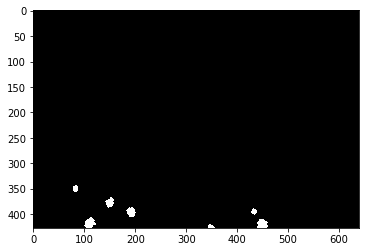

In [17]:
plt.imshow(mask, cmap = 'gray')
plt.show()

Use threshold as a parameter

In [19]:
def create_mask_threshold(image, threshold):
    image_gray = skimage.color.rgb2gray(image)
    
    #generate normal noise
    normal_matrix = np.random.randn(image_gray.shape[0], image_gray.shape[1])

    #add it to the image
    noisy_image = image_gray + 0.1*normal_matrix
    
    #rescale image to uint8
    noisy_image_int = noisy_image-noisy_image.min()
    noisy_image_int = 255*noisy_image_int/noisy_image_int.max()
    noisy_image_int = noisy_image_int.astype(np.uint8)

    #filter image to suppress noise
    image_median = median(noisy_image_int, selem=disk(3))
    
    #create mask
    mask = image_median>threshold
    
    #close the mask
    mask_closed = binary_opening(mask, selem=disk(2))
    
    #measure regions
    image_label = label(mask_closed)
    regions = regionprops(image_label, image_median)
    
    area = [x.area for x in regions]
    mean_intensity = [x.mean_intensity for x in regions]

    newmask = np.zeros(image_label.shape)
    for x in regions:
        if (x.area<500) and (x.mean_intensity>160):
            newmask[x.coords[:,0],x.coords[:,1]]=1
            
    return newmask

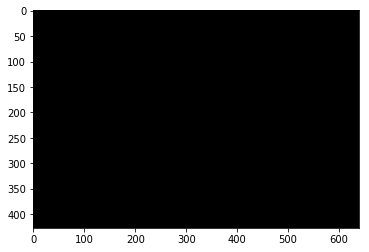

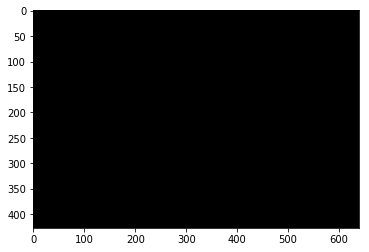

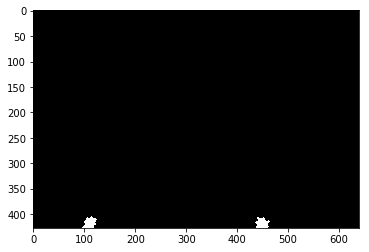

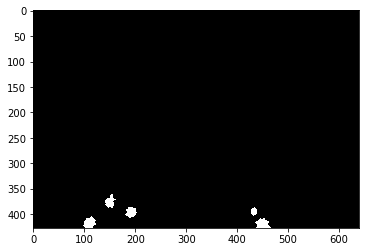

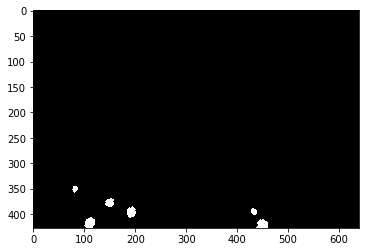

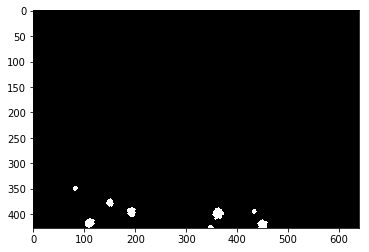

In [20]:
for th in range(100,160,10):
    mask = create_mask_threshold(image, threshold= th)
    plt.imshow(mask, cmap = 'gray')
    plt.show()